**Exploratory Data Analysis**

In [ ]:
# 1. Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
# Visualization settings
%matplotlib inline
sns.set(style="whitegrid", palette="pastel")


In [ ]:
# 2. Load Dataset
url = "https://github.com/MIT-Emerging-Talent/ET6-CDSP-group-08-repo/raw/main/1_datasets/cleaned_data/IRENA_ONGRIDStats.cleaned.xlsx"
df = pd.read_excel(url, engine="openpyxl")


In [ ]:
# 3. Quick Preview
print(df.head())
print("Shape of dataset:", df.shape)


   Region       Sub-region  Country ISO3 code         RE or Non-RE  \
0  Africa  Northern Africa  Algeria       DZA  Total Non-Renewable   
1  Africa  Northern Africa  Algeria       DZA  Total Non-Renewable   
2  Africa  Northern Africa  Algeria       DZA  Total Non-Renewable   
3  Africa  Northern Africa  Algeria       DZA  Total Non-Renewable   
4  Africa  Northern Africa  Algeria       DZA  Total Non-Renewable   

  Group Technology   Technology Sub-Technology        Producer Type  Year  \
0     Fossil fuels  Natural gas    Natural gas  On-grid electricity  2010   
1     Fossil fuels  Natural gas    Natural gas  On-grid electricity  2011   
2     Fossil fuels  Natural gas    Natural gas  On-grid electricity  2012   
3     Fossil fuels  Natural gas    Natural gas  On-grid electricity  2013   
4     Fossil fuels  Natural gas    Natural gas  On-grid electricity  2014   

   Electricity Installed Capacity (MW) Conflict_Status  
0                            10984.334    Non-Conflict  
1 

In [ ]:
# 4. Basic Info and Summary
print(df.info())
print(df.describe())
print("Columns:", df.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26633 entries, 0 to 26632
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               26633 non-null  object 
 1   Sub-region                           26633 non-null  object 
 2   Country                              26633 non-null  object 
 3   ISO3 code                            26633 non-null  object 
 4   RE or Non-RE                         26633 non-null  object 
 5   Group Technology                     26633 non-null  object 
 6   Technology                           26633 non-null  object 
 7   Sub-Technology                       26633 non-null  object 
 8   Producer Type                        26633 non-null  object 
 9   Year                                 26633 non-null  int64  
 10  Electricity Installed Capacity (MW)  26633 non-null  float64
 11  Conflict_Status             

In [ ]:
# 5. Missing Values
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
Region                                 0
Sub-region                             0
Country                                0
ISO3 code                              0
RE or Non-RE                           0
Group Technology                       0
Technology                             0
Sub-Technology                         0
Producer Type                          0
Year                                   0
Electricity Installed Capacity (MW)    0
Conflict_Status                        0
dtype: int64


In [ ]:
# 6. Unique Value Checks (Sanity Check)
print("Number of Countries:", df["Country"].nunique())
print("Year Range:", df["Year"].min(), "-", df["Year"].max())
print("Years:", sorted(df["Year"].unique()))
print("Conflict Status:", df["Conflict_Status"].unique())
print("Producer Types:", df["Producer Type"].unique())
print("RE Categories:", df["RE or Non-RE"].unique())


Number of Countries: 224
Year Range: 2010 - 2024
Years: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Conflict Status: ['Non-Conflict' 'Conflict']
Producer Types: ['On-grid electricity' 'Off-grid electricity']
RE Categories: ['Total Non-Renewable' 'Total Renewable']


In [ ]:
df["Country"].value_counts()
df["Year"].min(), df["Year"].max()
df["Conflict_Status"].value_counts()


In [ ]:
# 7. Value Distributions
print(df["Country"].value_counts())
print(df["Conflict_Status"].value_counts())


Country
United States of America (the)    382
Argentina                         342
Brazil                            336
Germany                           313
Thailand                          283
                                 ... 
Turks and Caicos Islands           25
Saint Barthélemy                   24
Montserrat                         21
Saint Pierre and Miquelon          20
Sint Maarten (Dutch Part)          13
Name: count, Length: 224, dtype: int64
Conflict_Status
Non-Conflict    25177
Conflict         1456
Name: count, dtype: int64


In [ ]:
df.head()
df.tail()


: 

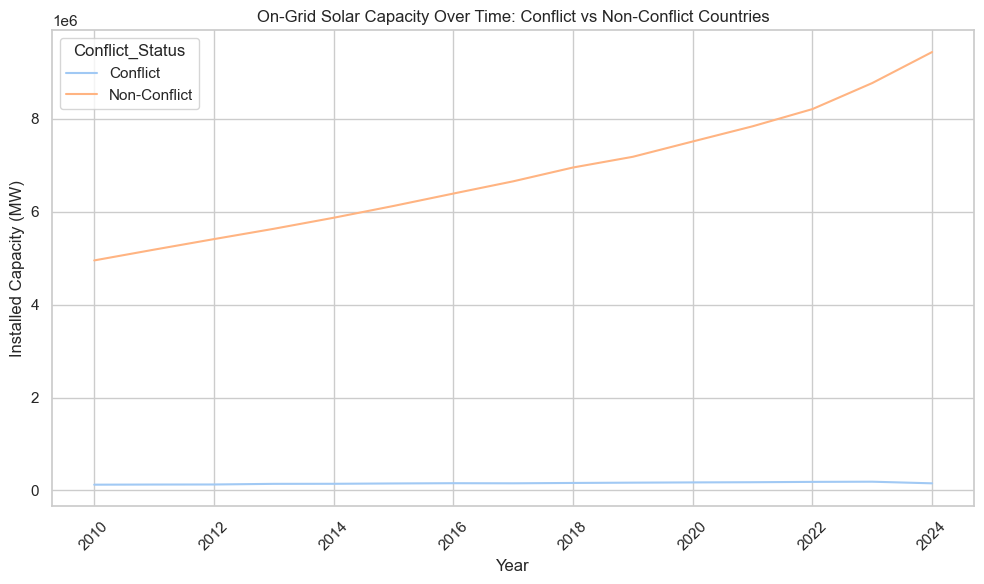

In [ ]:
# 8. Trends: Installed Capacity Over Time (Conflict vs Non-Conflict)
df_grouped = (
    df.groupby(["Year", "Conflict_Status"])["Electricity Installed Capacity (MW)"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_grouped,
    x="Year",
    y="Electricity Installed Capacity (MW)",
    hue="Conflict_Status",
)
plt.title("On-Grid Solar Capacity Over Time: Conflict vs Non-Conflict Countries")
plt.ylabel("Installed Capacity (MW)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


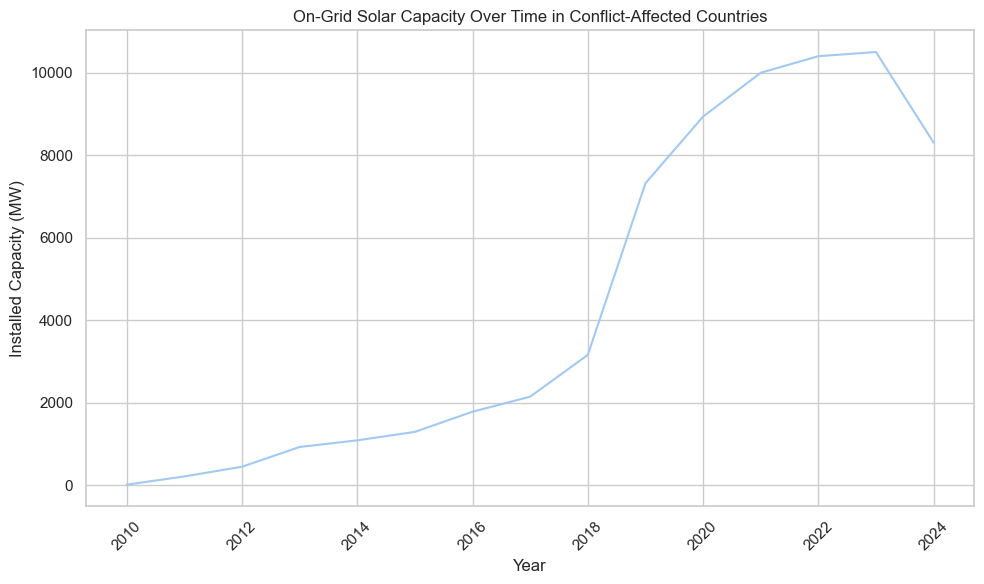

In [ ]:
# 8.1 Filter: Solar in Conflict-Affected Countries Only
df_solar_conflict = df[
    (df["Conflict_Status"] == "Conflict")
    & (df["Technology"].str.contains("Solar", case=False, na=False))
]

# Group by Year
df_solar_conflict_grouped = (
    df_solar_conflict.groupby("Year")["Electricity Installed Capacity (MW)"]
    .sum()
    .reset_index()
)

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_solar_conflict_grouped, x="Year", y="Electricity Installed Capacity (MW)"
)
plt.title("On-Grid Solar Capacity Over Time in Conflict-Affected Countries")
plt.ylabel("Installed Capacity (MW)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


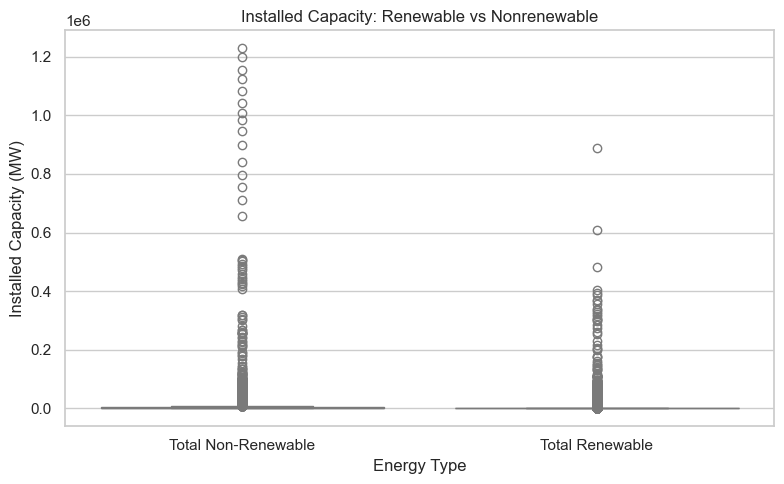

In [ ]:
# 9. Box Plot: Renewable vs Nonrenewable
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="RE or Non-RE", y="Electricity Installed Capacity (MW)")
plt.title("Installed Capacity: Renewable vs Nonrenewable")
plt.ylabel("Installed Capacity (MW)")
plt.xlabel("Energy Type")
plt.tight_layout()
plt.show()


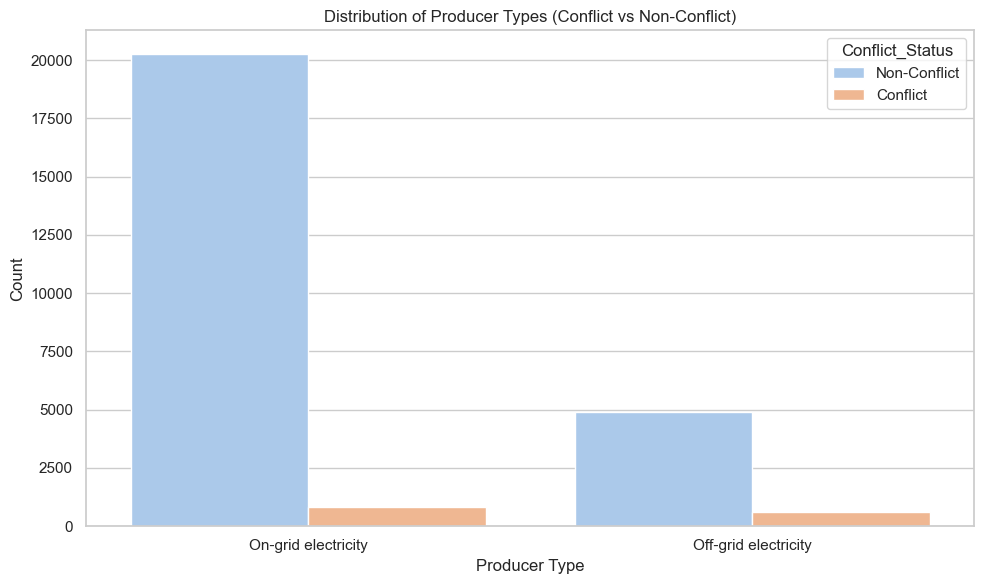

In [ ]:
# 11. On-Grid Producer Types by Conflict Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Producer Type", hue="Conflict_Status")
plt.title("Distribution of Producer Types (Conflict vs Non-Conflict)")
plt.xlabel("Producer Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
